In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import tree
import graphviz

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from pandas.plotting import lag_plot

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [6]:
url = 'https://raw.githubusercontent.com/EddieM2/Analisis-de-datos---Round-traces/main/round_traces.csv'
df = pd.read_csv(url, on_bad_lines='skip', sep=';')
df.head(5)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


# Comprensión de los datos

Para comenzar con el análisis de los datos, se utilizará 'describe' para poder visualizar los atributos estadísticos del set de datos, y así tener nociónes de las columnas

En orimer estancia, veremos la distribución en cuartiles de los datos numéricos, donde la mayoría de las columnas tienen distribuciones muy cerca de ser normales, a excepción de 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots', donde tienen una tendencia a distribuir de manera negativa, todas estas columnas posteriormente las graficaremos para poder tener mayor certeza de estas observaciones.

In [7]:
df.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [8]:
df.describe(include=[object])

,Map,Team,RoundWinner,MatchWinner,TimeAlive,TravelledDistance,FirstKillTime
count,79157,79155,79157,79156,79157,79157,79157
unique,4,2,5,2,51627,78001,33855
top,de_inferno,Terrorist,False,False,0.0,0.0,0.0
freq,28869,39591,23195,42017,68,272,5305


In [9]:
df.shape

(79157, 30)

In [10]:
df.dtypes

Unnamed: 0                       int64
Map                             object
Team                            object
InternalTeamId                   int64
MatchId                          int64
RoundId                          int64
RoundWinner                     object
MatchWinner                     object
Survived                          bool
AbnormalMatch                     bool
TimeAlive                       object
TravelledDistance               object
RLethalGrenadesThrown            int64
RNonLethalGrenadesThrown         int64
PrimaryAssaultRifle            float64
PrimarySniperRifle             float64
PrimaryHeavy                   float64
PrimarySMG                     float64
PrimaryPistol                    int64
FirstKillTime                   object
RoundKills                       int64
RoundAssists                     int64
RoundHeadshots                   int64
RoundFlankKills                  int64
RoundStartingEquipmentValue      int64
TeamStartingEquipmentValu

In [17]:
df['RoundWinner'].unique()

array(['False', 'True', 'False4', True, False], dtype=object)

In [18]:
df['RoundWinner'] = df['RoundWinner'].replace('False4', 'False')

In [21]:
df['RoundWinner'] = df['RoundWinner'].apply(lambda x: str(x))

In [22]:
df['RoundWinner'].unique()

array(['False', 'True'], dtype=object)

In [25]:
df['MatchWinner'].unique()

array([True, False, nan], dtype=object)

In [15]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """# Distribución de variables categóricas
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,5))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

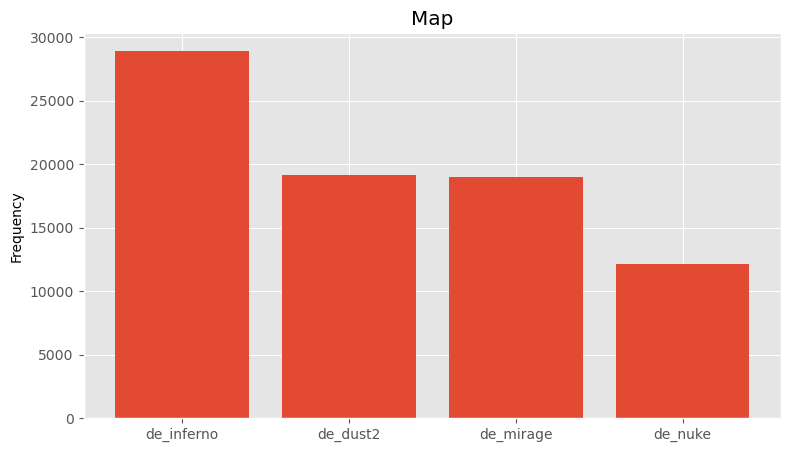

Map: 
 Map
de_inferno    28869
de_dust2      19120
de_mirage     19019
de_nuke       12149
Name: count, dtype: int64


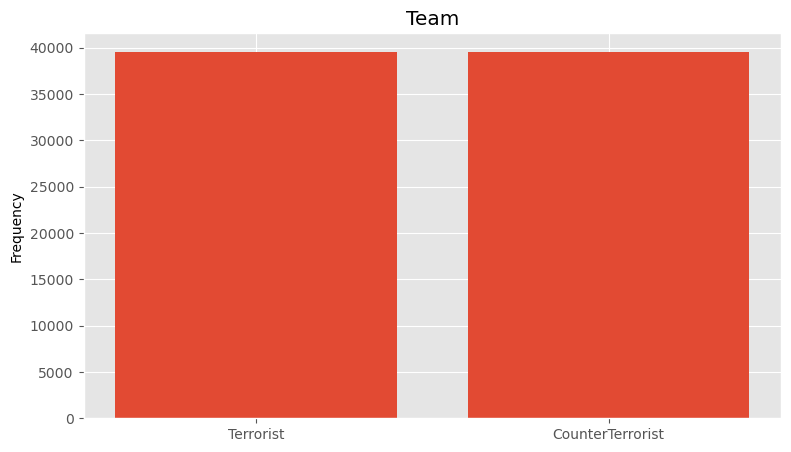

Team: 
 Team
Terrorist           39593
CounterTerrorist    39564
Name: count, dtype: int64


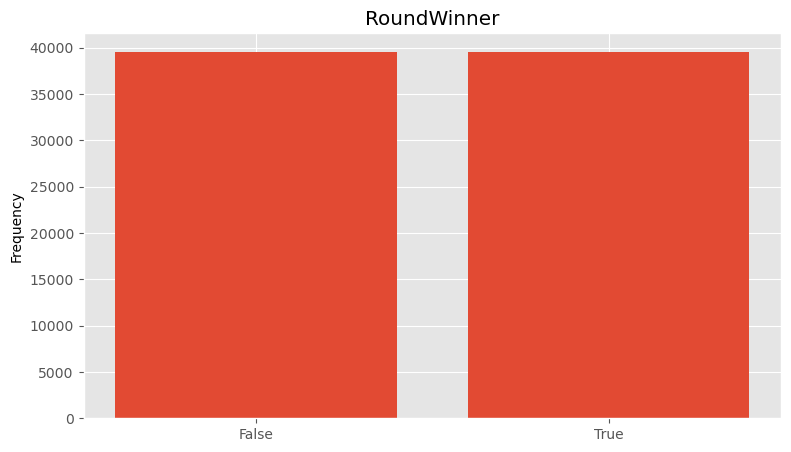

RoundWinner: 
 RoundWinner
False    39589
True     39568
Name: count, dtype: int64


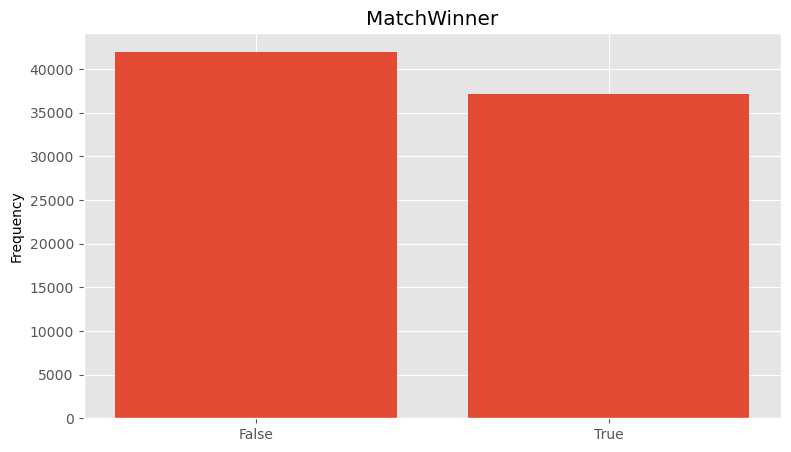

MatchWinner: 
 MatchWinner
False    42018
True     37139
Name: count, dtype: int64


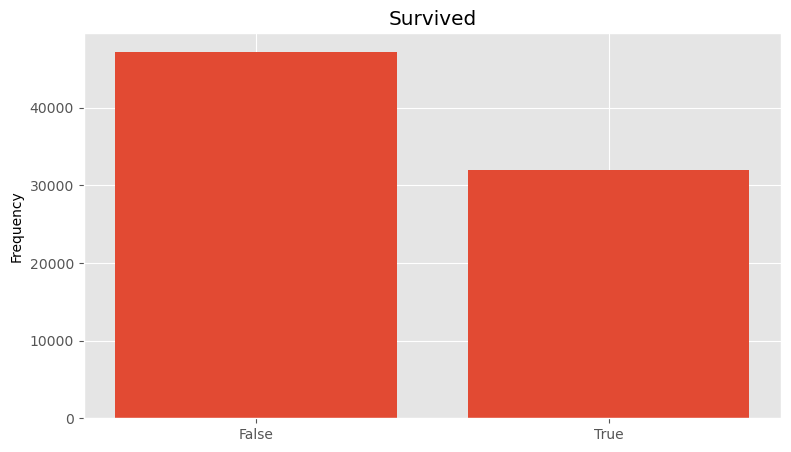

Survived: 
 Survived
False    47214
True     31943
Name: count, dtype: int64


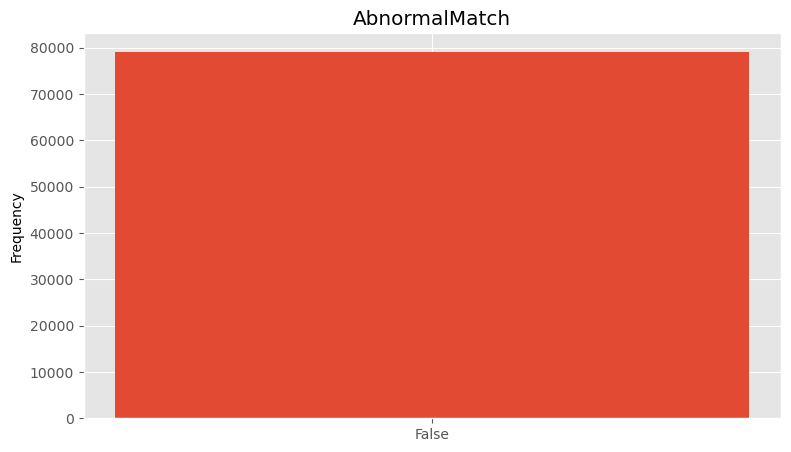

AbnormalMatch: 
 AbnormalMatch
False    79157
Name: count, dtype: int64


In [30]:
category1 = ["Map","Team", "RoundWinner", "MatchWinner", "Survived", "AbnormalMatch"]
for c in category1:
    bar_plot(c)

# Preparación de los datos

A continuación evaluamos las columnas que presentan valores Nulls, donde encontramos que son mínimos, y se encuentran dentro de columnas categóricas, por lo cual reemplazaramos los valores nulos por la moda de estas columnas.

In [26]:
# Valores nulos
for feature in df.columns:
    print('Total de valores nulos de', feature, '=', df[feature].isna().sum())

Total de valores nulos de Unnamed: 0 = 0
Total de valores nulos de Map = 0
Total de valores nulos de Team = 2
Total de valores nulos de InternalTeamId = 0
Total de valores nulos de MatchId = 0
Total de valores nulos de RoundId = 0
Total de valores nulos de RoundWinner = 0
Total de valores nulos de MatchWinner = 1
Total de valores nulos de Survived = 0
Total de valores nulos de AbnormalMatch = 0
Total de valores nulos de TimeAlive = 0
Total de valores nulos de TravelledDistance = 0
Total de valores nulos de RLethalGrenadesThrown = 0
Total de valores nulos de RNonLethalGrenadesThrown = 0
Total de valores nulos de PrimaryAssaultRifle = 0
Total de valores nulos de PrimarySniperRifle = 0
Total de valores nulos de PrimaryHeavy = 0
Total de valores nulos de PrimarySMG = 0
Total de valores nulos de PrimaryPistol = 0
Total de valores nulos de FirstKillTime = 0
Total de valores nulos de RoundKills = 0
Total de valores nulos de RoundAssists = 0
Total de valores nulos de RoundHeadshots = 0
Total d

In [27]:
tipos = df.columns.to_series().groupby(df.dtypes).groups
ctext = tipos[np.dtype('object')]
len(ctext)

7

In [28]:
for columna in ctext:
    mode = df[columna].mode()[0]
    df[columna] = df[columna].fillna(mode)

In [29]:
# Valores nulos
for feature in df.columns:
    print('Total de valores nulos de', feature, '=', df[feature].isna().sum())

Total de valores nulos de Unnamed: 0 = 0
Total de valores nulos de Map = 0
Total de valores nulos de Team = 0
Total de valores nulos de InternalTeamId = 0
Total de valores nulos de MatchId = 0
Total de valores nulos de RoundId = 0
Total de valores nulos de RoundWinner = 0
Total de valores nulos de MatchWinner = 0
Total de valores nulos de Survived = 0
Total de valores nulos de AbnormalMatch = 0
Total de valores nulos de TimeAlive = 0
Total de valores nulos de TravelledDistance = 0
Total de valores nulos de RLethalGrenadesThrown = 0
Total de valores nulos de RNonLethalGrenadesThrown = 0
Total de valores nulos de PrimaryAssaultRifle = 0
Total de valores nulos de PrimarySniperRifle = 0
Total de valores nulos de PrimaryHeavy = 0
Total de valores nulos de PrimarySMG = 0
Total de valores nulos de PrimaryPistol = 0
Total de valores nulos de FirstKillTime = 0
Total de valores nulos de RoundKills = 0
Total de valores nulos de RoundAssists = 0
Total de valores nulos de RoundHeadshots = 0
Total d

Aquí corroboramos los valores de 'RoundWinner', la cual presentaba un valor que no corresponde, así que con 'unique' verificamos el valor, y lo reemplazamos por el correspondiente, ya que nos daba problemas al convertirla a valor numérico, esto no perjudica el procedimiento de los datos, por el contrario nos clarifica su uso.

# Distribución de variables categóricas

In [32]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)

ValueError: could not convert string to float: 'Terrorist'

<Figure size 1500x1500 with 0 Axes>

A continuación se visualizaron los valores que no pudimos utilizar en los gráficos de distribución para poder entender el por qué no se graficaban, llegando a la conclusión de que el tipo de dato tiene un formato confuza, por lo cual no la utilizaremos en ejercicios posteriores.

In [14]:
df[['TimeAlive', 'TravelledDistance', 'FirstKillTime']]

,TimeAlive,TravelledDistance,FirstKillTime
0,51.120.248.995.704.500,10.083.140.737.457.000,0.0
1,4.348.662.552.266.170,60.960.883.184.688.400,0.0
2,3.735.469.847.054.540,5.642.252.383.582.750,0.0
3,4.767.886.136.441.470,8.963.473.313.229.970,0.0
4,5.312.251.089.027.310,10.865.649.734.393.100,0.0
...,...,...,...
79152,340.272.074.099.723,4.048.177.852.924.460,2.277.596
79153,2.926.105.436.288.080,3.213.477.612.567.870,28.714.119
79154,5.914.717.797.783.930,6.005.168.938.274.500,297.689.228
79155,42.582.842.797.783.900,27.987.628.542.398.100,7.528.178


A continuación creamos un nuevo df con la finalidad de tener las columnas que nos serán relevantes para el desarrollo de los modelos, pero antes de eso, usaremos one hot encoding y label encoding para las variables categoricas y de esa manera visualizar las correlaciones de estas y poder elegir nuestro target.

In [23]:
df_ordenado = df[['Map','Team','InternalTeamId','MatchId','RoundId','RoundWinner','MatchWinner','Survived',
                  'RLethalGrenadesThrown','RNonLethalGrenadesThrown',
                 'PrimaryAssaultRifle','PrimarySniperRifle','PrimaryHeavy','PrimarySMG','PrimaryPistol',                  
                 'RoundKills','RoundAssists','RoundHeadshots','RoundFlankKills','RoundStartingEquipmentValue',
                 'TeamStartingEquipmentValue','MatchKills','MatchFlankKills','MatchAssists','MatchHeadshots']]
df_ordenado

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,RNonLethalGrenadesThrown,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,de_inferno,Terrorist,1,4,1,False,True,False,0,4,...,0,0,0,0,750,4400,0,0,0,0
1,de_inferno,Terrorist,1,4,1,False,True,False,0,0,...,0,0,0,0,800,4400,0,0,0,0
2,de_inferno,Terrorist,1,4,1,False,True,False,0,0,...,0,0,0,0,1000,4400,0,0,0,0
3,de_inferno,Terrorist,1,4,1,False,True,False,0,0,...,0,0,0,0,850,4400,0,0,0,0
4,de_inferno,Terrorist,1,4,1,False,True,True,1,1,...,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,de_mirage,CounterTerrorist,2,511,5,False,False,False,1,1,...,0,0,0,0,5600,27100,4,0,2,2
79153,de_mirage,CounterTerrorist,2,511,5,False,False,False,0,0,...,1,0,1,0,5500,27100,8,5,1,3
79154,de_mirage,CounterTerrorist,2,511,5,False,False,False,1,1,...,0,0,0,0,4950,27100,5,0,2,3
79155,de_mirage,CounterTerrorist,2,511,5,False,False,False,0,2,...,0,0,0,0,4950,27100,1,0,1,0


Utilizamos one hot encoding solamente para la columna 'Map' ya que es la única variable categórica que presenta más de 2 valores dentro de su columnna, mientras que las demás las demás varibales categóricas como: 'Team', 'RoundWinner', 'MatchWinner' y 'Survived' presentan 2 variables dentro de las columnas, por esto es más recomendable aplicar label encoding.

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Define el ejemplo
data = df_ordenado['Map']
values = np.array(data)
print('Valores:', values)

# Codificación entera
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print('Label encoder integer:', integer_encoded)

# Codificación binaria
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print('One-hot encoder:\n', onehot_encoded)

# Invierte el primer ejemplo
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
print(inverted)


Valores: ['de_inferno' 'de_inferno' 'de_inferno' ... 'de_mirage' 'de_mirage'
 'de_mirage']
Label encoder integer: [1 1 1 ... 2 2 2]
One-hot encoder:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
['de_inferno']


In [25]:
# Obtén los nombres de las categorías
categories = label_encoder.classes_

# Crea un dataframe a partir de las columnas codificadas
onehot_df = pd.DataFrame(onehot_encoded, columns=categories)

# Concatena el dataframe original con el dataframe codificado
df_ordenado = pd.concat([df, onehot_df], axis=1)
df_ordenado

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,de_dust2,de_inferno,de_mirage,de_nuke
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,750,4400,0,0,0,0,0.0,1.0,0.0,0.0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,800,4400,0,0,0,0,0.0,1.0,0.0,0.0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,1000,4400,0,0,0,0,0.0,1.0,0.0,0.0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,850,4400,0,0,0,0,0.0,1.0,0.0,0.0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,1000,4400,0,0,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,5600,27100,4,0,2,2,0.0,0.0,1.0,0.0
79153,123776,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,5500,27100,8,5,1,3,0.0,0.0,1.0,0.0
79154,123777,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,4950,27100,5,0,2,3,0.0,0.0,1.0,0.0
79155,123778,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,4950,27100,1,0,1,0,0.0,0.0,1.0,0.0


In [26]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar label encoding a la columna "RoundWinner"
df_ordenado['Team'] = label_encoder.fit_transform(df_ordenado['Team'])

# Imprimir los resultados
print(df_ordenado[['Team', 'Team']].head())


   Team  Team
0     1     1
1     1     1
2     1     1
3     1     1
4     1     1


In [27]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar label encoding a la columna "RoundWinner"
df_ordenado['MatchWinner'] = label_encoder.fit_transform(df_ordenado['MatchWinner'])

# Imprimir los resultados
print(df_ordenado[['MatchWinner', 'MatchWinner']].head())


   MatchWinner  MatchWinner
0            1            1
1            1            1
2            1            1
3            1            1
4            1            1


In [28]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar label encoding a la columna "RoundWinner"
df_ordenado['Team'] = label_encoder.fit_transform(df_ordenado['Team'])

# Imprimir los resultados
print(df_ordenado[['Team', 'Team']].head())


   Team  Team
0     1     1
1     1     1
2     1     1
3     1     1
4     1     1


In [29]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar label encoding a la columna "RoundWinner"
df_ordenado['Survived'] = label_encoder.fit_transform(df_ordenado['Survived'])

# Imprimir los resultados
print(df_ordenado[['Survived', 'Survived']].head())


   Survived  Survived
0         0         0
1         0         0
2         0         0
3         0         0
4         1         1


In [30]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar label encoding a la columna "RoundWinner"
df_ordenado['RoundWinner'] = label_encoder.fit_transform(df_ordenado['RoundWinner'])

# Imprimir los resultados
print(df_ordenado[['RoundWinner', 'RoundWinner']].head())


   RoundWinner  RoundWinner
0            0            0
1            0            0
2            0            0
3            0            0
4            0            0


In [31]:
df_ordenado

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,de_dust2,de_inferno,de_mirage,de_nuke
0,600,de_inferno,1,1,4,1,0,1,0,False,...,750,4400,0,0,0,0,0.0,1.0,0.0,0.0
1,601,de_inferno,1,1,4,1,0,1,0,False,...,800,4400,0,0,0,0,0.0,1.0,0.0,0.0
2,602,de_inferno,1,1,4,1,0,1,0,False,...,1000,4400,0,0,0,0,0.0,1.0,0.0,0.0
3,603,de_inferno,1,1,4,1,0,1,0,False,...,850,4400,0,0,0,0,0.0,1.0,0.0,0.0
4,604,de_inferno,1,1,4,1,0,1,1,False,...,1000,4400,0,0,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,de_mirage,0,2,511,5,0,0,0,False,...,5600,27100,4,0,2,2,0.0,0.0,1.0,0.0
79153,123776,de_mirage,0,2,511,5,0,0,0,False,...,5500,27100,8,5,1,3,0.0,0.0,1.0,0.0
79154,123777,de_mirage,0,2,511,5,0,0,0,False,...,4950,27100,5,0,2,3,0.0,0.0,1.0,0.0
79155,123778,de_mirage,0,2,511,5,0,0,0,False,...,4950,27100,1,0,1,0,0.0,0.0,1.0,0.0


Ahora que tenemos las variables categórica en número, procederemos a crear un nuevo df con la finalidad de tomar las columnas que nos serán relevantes para nuestro desarrollo de modelos, donde dejamos fuera columnas que nos eran irrelevantes, como: 'abnormalMatch', 'FirstKillTime', 'TravelledDistance' y 'TimeAlive'.

In [32]:
df_real = df_ordenado[['Team','InternalTeamId','MatchId','RoundId','RoundWinner','MatchWinner','Survived',
                 'RLethalGrenadesThrown','RNonLethalGrenadesThrown',
                 'PrimaryAssaultRifle','PrimarySniperRifle','PrimaryHeavy','PrimarySMG','PrimaryPistol',                  
                 'RoundKills','RoundAssists','RoundHeadshots','RoundFlankKills','RoundStartingEquipmentValue',
                 'TeamStartingEquipmentValue','MatchKills','MatchFlankKills','MatchAssists','MatchHeadshots', 'de_dust2',
                'de_inferno', 'de_mirage', 'de_nuke']]
df_real.head()

,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,...,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,de_dust2,de_inferno,de_mirage,de_nuke
0,1,1,4,1,0,1,0,0,4,0.0,...,750,4400,0,0,0,0,0.0,1.0,0.0,0.0
1,1,1,4,1,0,1,0,0,0,0.0,...,800,4400,0,0,0,0,0.0,1.0,0.0,0.0
2,1,1,4,1,0,1,0,0,0,0.0,...,1000,4400,0,0,0,0,0.0,1.0,0.0,0.0
3,1,1,4,1,0,1,0,0,0,0.0,...,850,4400,0,0,0,0,0.0,1.0,0.0,0.0
4,1,1,4,1,0,1,1,1,1,0.0,...,1000,4400,0,0,0,0,0.0,1.0,0.0,0.0


A continuación, las columnas que nos interesa evaluar son las columnas categóricas, y viendo el gráfico de correlación, hemos evaluado que la columnas con mejores correlaciones sería 'Survived', ya que presenta mejores correlaciones con otras columnas, más que las otras categóricas, las correlaciones que se presentan son: 'RLethalGrenadesThrown' con 17% de correlación, 'RNonLethalGrenadesThrown' con 13%, 'PrimaryAssaultRifle' con 11%, 'RoundKills' con 33%, 'RoundHeadshots' con 21%, 'RoundFlankKills' con 14%, 'RoundStartingEquipmentValue' con 17% y 'TeamStartingEquipmentValue' con 17%

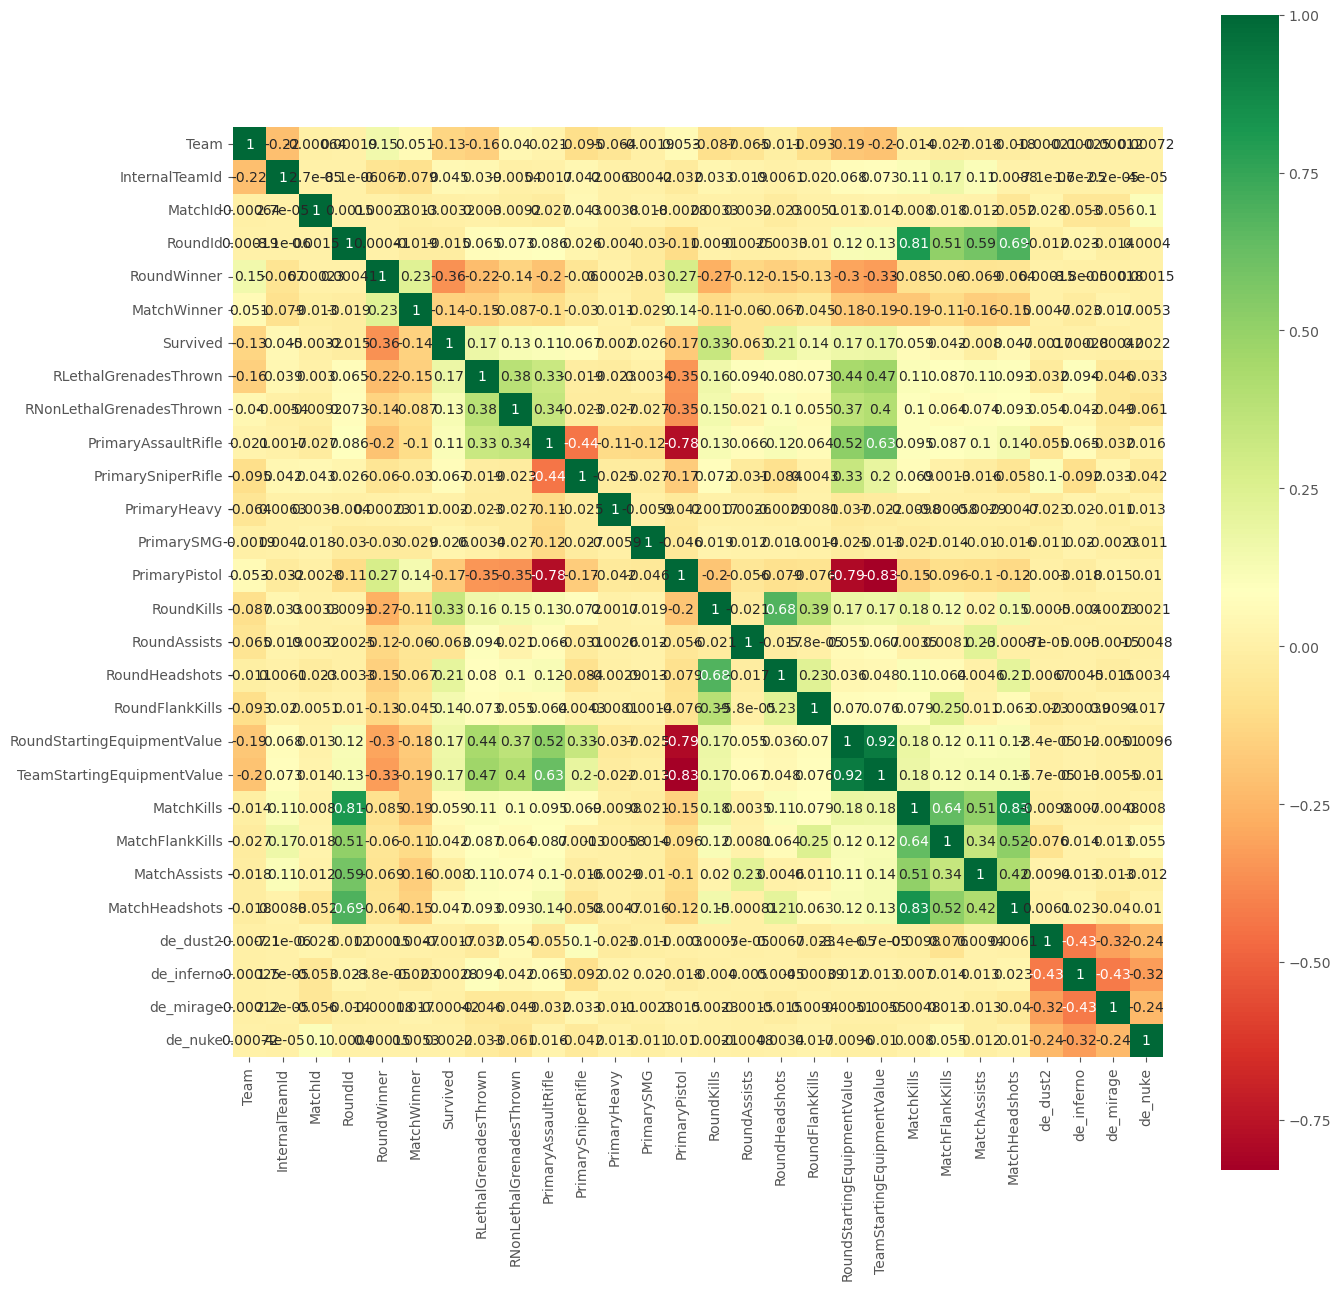

In [33]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df_real.corr(), annot=True,cmap='RdYlGn',square=True)

Aquí quitamos algunas columnas irrelevantes para poder graficar las correlaciones y no se sobrepongan y usarla para nuestra presentación.

In [34]:
df_real = df_ordenado[['RoundWinner','MatchWinner','Survived',
                 'RLethalGrenadesThrown','RNonLethalGrenadesThrown',
                 'PrimaryAssaultRifle','PrimarySniperRifle','PrimaryHeavy','PrimarySMG','PrimaryPistol',                  
                 'RoundKills','RoundAssists','RoundHeadshots','RoundFlankKills','RoundStartingEquipmentValue',
                 'TeamStartingEquipmentValue','MatchKills','MatchFlankKills','MatchAssists','MatchHeadshots']]

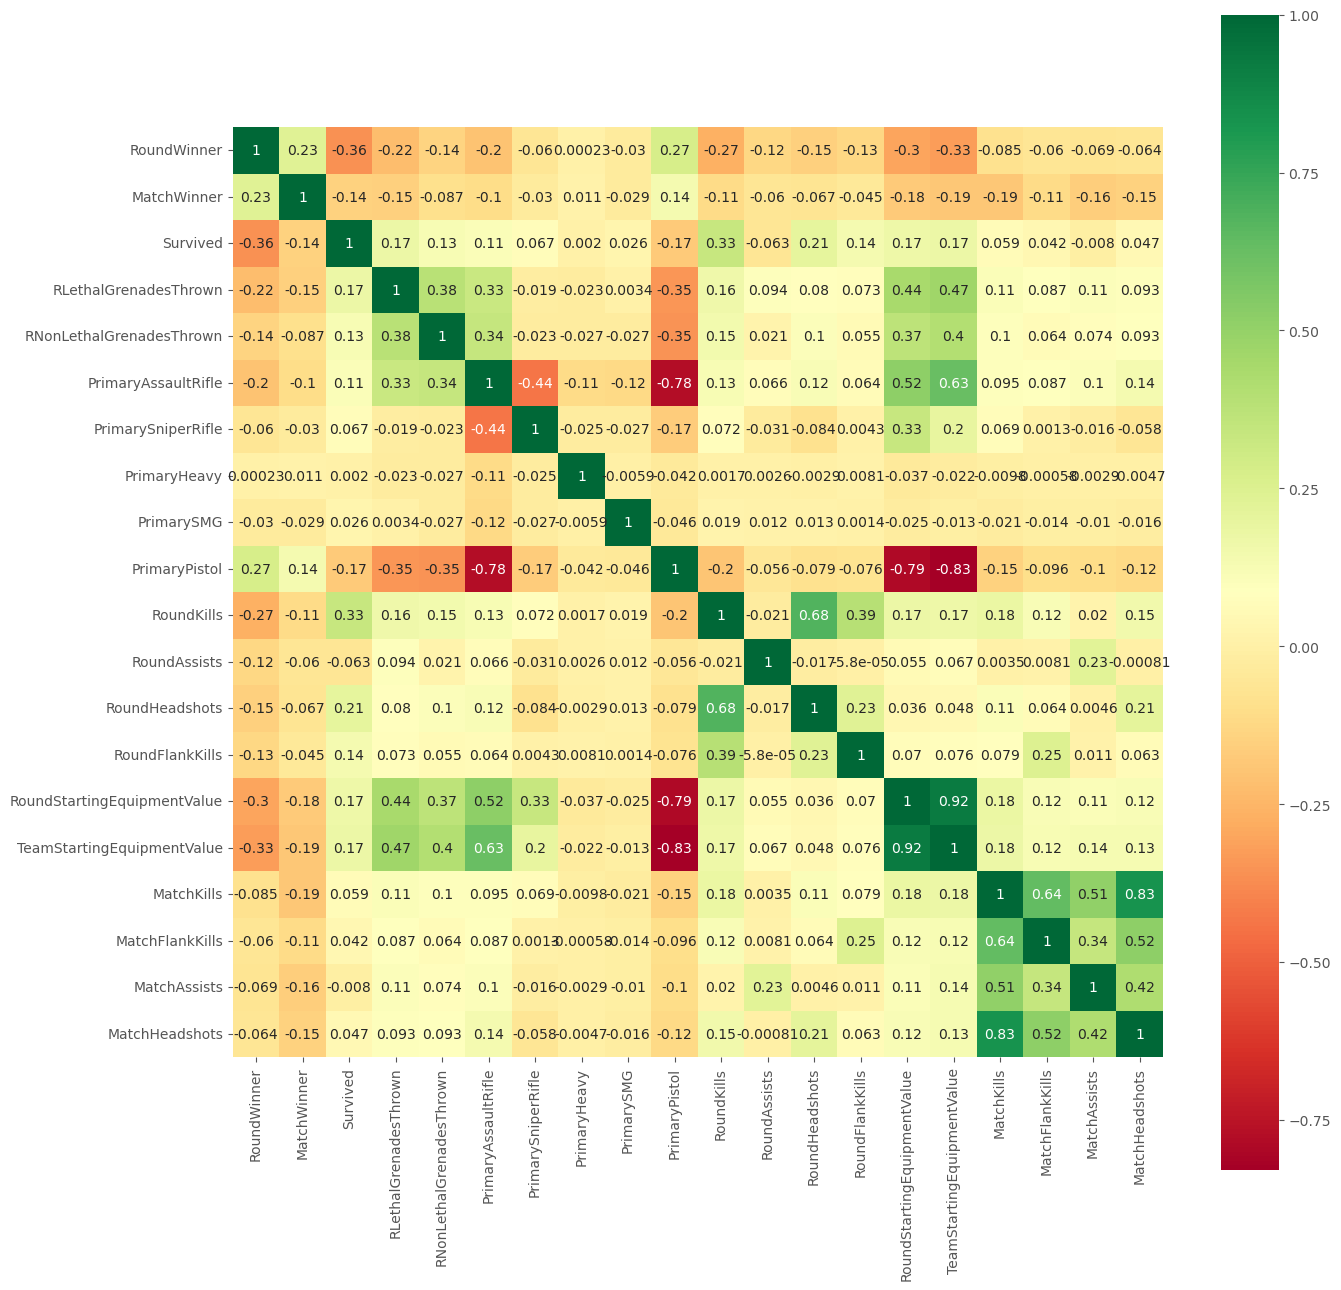

In [35]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df_real.corr(), annot=True,cmap='RdYlGn',square=True)

A continuación crearemos un df exclusivamente para el uso de modelos solo con las variables a utilizar.

In [36]:
df_modelos = df_real[['Survived', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle',                  
                 'RoundKills','RoundHeadshots','RoundFlankKills','RoundStartingEquipmentValue',
                 'TeamStartingEquipmentValue']]
df_modelos

,Survived,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,RoundKills,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue
0,0,0,4,0.0,0,0,0,750,4400
1,0,0,0,0.0,0,0,0,800,4400
2,0,0,0,0.0,0,0,0,1000,4400
3,0,0,0,0.0,0,0,0,850,4400
4,1,1,1,0.0,0,0,0,1000,4400
...,...,...,...,...,...,...,...,...,...
79152,0,1,1,1.0,0,0,0,5600,27100
79153,0,0,0,1.0,1,1,0,5500,27100
79154,0,1,1,1.0,0,0,0,4950,27100
79155,0,0,2,0.0,0,0,0,4950,27100


Utilizamos el siguiente código para poder crear un nuevo csv con las columnas que utilizaremos en los modelos, para de esa forma poder descargarlo y usarlo dentro de nuestro formulario.

In [37]:
# Guardar DataFrame como CSV
df_modelos.to_csv('df_modelos.csv', index=False)

# Generar enlace de descarga
from IPython.display import FileLink
FileLink('df_modelos.csv')

C:\Users\Edgard\Desktop\Machine Learning\df_modelos.csv

# Modelamiento

A continuación, graficamos la distribución de nuestro target, y como se puede ver, se presenta un desbalance de este, lo cual puede provocar problemas con nuestros modelos de clasificación, es por eso que nos hemos planteado usar técnicas de 'Combined Sampling para poder abordar el desbalance de clases.

Text(0.5, 1.0, 'Distribucion de Survived de el dataset en general')

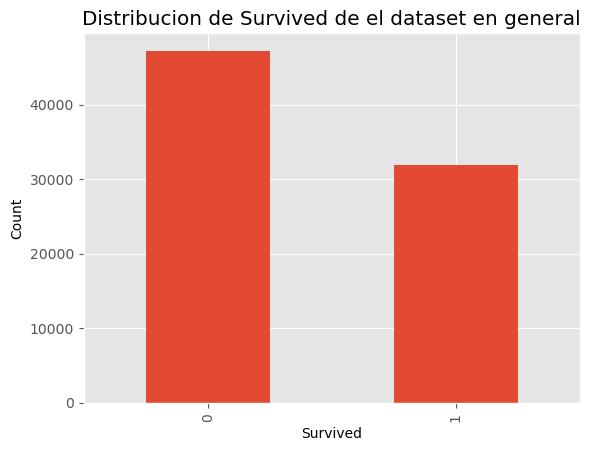

In [40]:
df_modelos['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribucion de Survived de el dataset en general')

# Random forest con mix sampling

Aquí desarrollamos el modelo de Random forest con un sampling combinado entre undersampling y oversampling, la cual fue la que nos arrojó mejores resultados dentro de las métricas a diferencia de las técnicas por separado.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Aplicar oversampling (SMOTE) solo a los datos de entrenamiento
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Mostrar datos de entrenamiento y prueba
print("Datos de entrenamiento:")
print(X_train_resampled.shape)
print(y_train_resampled.shape)
print("\nDatos de prueba:")
print(X_test.shape)
print(y_test.shape)

# Crear el modelo Random Forest con 100 árboles y aumentar la profundidad máxima
model_rf = RandomForestClassifier(n_estimators=100, bootstrap=True, verbose=2, max_features='sqrt', max_depth=20)

# Entrenar el modelo con los datos de entrenamiento resampleados
model_rf.fit(X_train_resampled, y_train_resampled)
pred_y = model_rf.predict(X_test)

# Mostrar resultados con los datos de entrenamiento
print("Resultados con los datos de entrenamiento:")
mostrar_resultados(y_train_resampled, model_rf.predict(X_train_resampled))

# Mostrar resultados con los datos de prueba
print("Resultados con los datos de prueba:")
mostrar_resultados(y_test, pred_y)


NameError: name 'X' is not defined

Aquí tenemos en nuestros datos de entrenamiento, las variables de precision, recall, f1-score y support, donde nos dan los resultados de 2 clases, las cuales son 0 y 1, esto nos indica si sobrevive (0) o no sobrevive (1).
Aquí tenemos una precisione del 85% en la clase 0 y del 87% en la clase 1, esto se refiere a la proporción de predicciones positivas correctas con respecto al total de predicciones positivas realizadas por el modelo, esto indica que el modelo tiene una alta precisión en la clasificación de ambas clases.
Luego tenemos recall, donde tenemos 88% de la clase 0 y 84% de la clase 1, se refiere a la proporción de casos positivos reales que fueron correctamente identificados por el modelo.Esto indica que el modelo tiene un buen rendimiento en la identificación de casos positivos reales para ambas clases.
Despues tendremos f1-score, donde en ambas clases nos da un 86%, el cual es una medida que combina la precisión y el recall en un solo valor, proporcionando una medida general del rendimiento del modelo. Esto indica un equilibrio entre la precisión y el recall de nuestro modelo.
Y el support representa el numero de instancias o datos etiquetados, y lo que sugiere que el conjunto de datos está equilibrado en términos de la distribución de clases.

Luego tenemos las métricas de prueba, donde se puede ver una una leve baja en los porcentajes a un 76%, lo cual sigue estando dentro del rango aceptable, esto indica que las métricas se ajustan a los datos reales y a las predicciones con un 76% de precisione. Las métricas tienen los mismos significados en entrenamiento y prueba, solo varia un poco el resultado.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


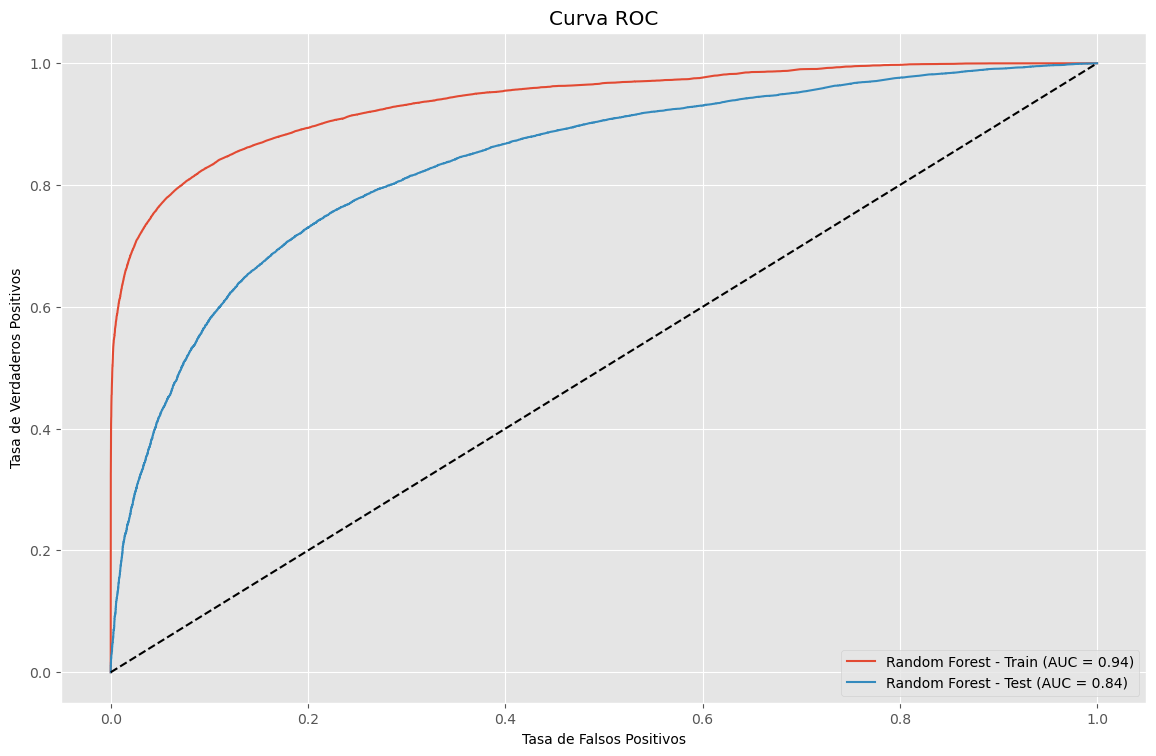

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener las probabilidades de las clases positivas
y_probs_train = model_rf.predict_proba(X_train)[:, 1]
y_probs_test = model_rf.predict_proba(X_test)[:, 1]

# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales para los datos de entrenamiento
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_probs_train)

# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales para los datos de prueba
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_probs_test)

# Calcular el área bajo la curva ROC para los datos de entrenamiento y prueba
auc_train = roc_auc_score(y_train, y_probs_train)
auc_test = roc_auc_score(y_test, y_probs_test)

# Graficar la curva ROC
plt.plot(fpr_train, tpr_train, label='Random Forest - Train (AUC = {:.2f})'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Random Forest - Test (AUC = {:.2f})'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia para un clasificador aleatorio
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


La curva ROC muestra cómo cambia el equilibrio entre la tasa de verdaderos positivos y la tasa de falsos positivos a medida que se varía el umbral de clasificación del modelo. se acerque lo más posible al punto (0,1), lo que indicaría una tasa de verdaderos positivos del 100% y una tasa de falsos positivos del 0%. Cuanto más cerca esté la curva ROC del punto (0,1), mejor será el rendimiento del modelo. y como podemos ver, la tasa de verdaderos positivos en entrenamiento y prueba son muy altos, estando muy cerca de del 100%, lo cual es el objetivo para poder decir que el modelo está clasificando de manera correcta los datos, o por lo menos de manera muy acertada.

# Regresión logistica con Mix Sampling

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Seleccionar las variables independientes y la variable dependiente
X = df_modelos[['RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle',
                 'RoundKills','RoundHeadshots','RoundFlankKills','RoundStartingEquipmentValue',
                 'TeamStartingEquipmentValue']]
y = df_modelos['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Realizar undersampling en el conjunto de entrenamiento utilizando NearMiss
nm = NearMiss()
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

# Realizar oversampling en el conjunto de entrenamiento utilizando SMOTE
smote = SMOTE()
X_train_resampled_oversampled, y_train_resampled_oversampled = smote.fit_resample(X_train_resampled, y_train_resampled)

# Crear y ajustar el modelo de regresión logística utilizando los datos resampleados
logistic_model = LogisticRegression()
logistic_model.fit(X_train_resampled_oversampled, y_train_resampled_oversampled)

# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

# Calcular las métricas de evaluación para el conjunto de entrenamiento y prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_error = 1 - train_accuracy

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_error = 1 - test_accuracy

# Calcular la matriz de confusión
train_confusion = confusion_matrix(y_train, y_train_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)

# Calcular las métricas de precisión, recall y F1-Score y agregarlas a la matriz de confusión
train_precision_confusion = train_confusion[1, 1] / (train_confusion[1, 1] + train_confusion[0, 1])
train_recall_confusion = train_confusion[1, 1] / (train_confusion[1, 1] + train_confusion[1, 0])
train_f1_confusion = 2 * (train_precision_confusion * train_recall_confusion) / (train_precision_confusion + train_recall_confusion)

test_precision_confusion = test_confusion[1, 1] / (test_confusion[1, 1] + test_confusion[0, 1])
test_recall_confusion = test_confusion[1, 1] / (test_confusion[1, 1] + test_confusion[1, 0])
test_f1_confusion = 2 * (test_precision_confusion * test_recall_confusion) / (test_precision_confusion + test_recall_confusion)

# Imprimir las métricas de entrenamiento
print("Métricas de entrenamiento:")
print("Precisión del modelo: {:.2f}%".format(train_precision * 100))
print("Exactitud: {:.2f}%".format(train_accuracy * 100))
print("Recall: {:.2f}".format(train_recall))
print("F1 Score: {:.2f}".format(train_f1))
print("Tasa de error: {:.2f}%".format(train_error * 100))
print("Matriz de confusión:\n", train_confusion)
print("Precisión (confusión): {:.2f}%".format(train_precision_confusion * 100))
print("Recall (confusión): {:.2f}".format(train_recall_confusion))
print("F1 Score (confusión): {:.2f}".format(train_f1_confusion))

# Imprimir las métricas de prueba
print("\nMétricas de prueba:")
print("Precisión del modelo: {:.2f}%".format(test_precision * 100))
print("Exactitud: {:.2f}%".format(test_accuracy * 100))
print("Recall: {:.2f}".format(test_recall))
print("F1 Score: {:.2f}".format(test_f1))
print("Tasa de error: {:.2f}%".format(test_error * 100))
print("Matriz de confusión:\n", test_confusion)
print("Precisión (confusión): {:.2f}%".format(test_precision_confusion * 100))
print("Recall (confusión): {:.2f}".format(test_recall_confusion))
print("F1 Score (confusión): {:.2f}".format(test_f1_confusion))


Métricas de entrenamiento:
Precisión del modelo: 57.63%
Exactitud: 65.97%
Recall: 0.60
F1 Score: 0.59
Tasa de error: 34.03%
Matriz de confusión:
 [[26480 11249]
 [10298 15298]]
Precisión (confusión): 57.63%
Recall (confusión): 0.60
F1 Score (confusión): 0.59

Métricas de prueba:
Precisión del modelo: 57.62%
Exactitud: 66.39%
Recall: 0.61
F1 Score: 0.59
Tasa de error: 33.61%
Matriz de confusión:
 [[6633 2852]
 [2469 3878]]
Precisión (confusión): 57.62%
Recall (confusión): 0.61
F1 Score (confusión): 0.59


Aquí en nuestra regresión logística tenemos en nuestros datos de entrenamiento y prueba, donde las métricas son muy similares, con pequeñas variaciones dentro del 1%, estas métricas alcanzan precisiones de 57.63% en entrenamiento y 57.52% en prueba, estas métricas nos indican que la proporción de predicciones positivas correctas con respecto al total de predicciones positivas realizadas por el modelo, esto indica que el modelo tiene una media precisión en la clasificación de ambas clases. Este porcentaje no es un buen indicador de precisión, ya que al predecir los datos, sería como arrojar una moneda al aire, teniendo un 50/50 de probabilidades de acierto, por esto tenemos un estandar de un mínimo de 75% de precision para considerar un modelo como 'bueno'.

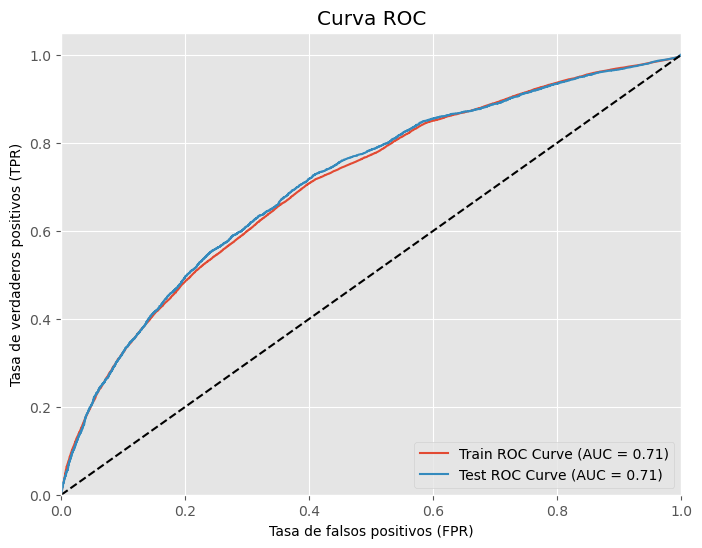

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de las clases en lugar de las etiquetas de predicción
y_train_prob = logistic_model.predict_proba(X_train)[:, 1]
y_test_prob = logistic_model.predict_proba(X_test)[:, 1]

# Calcular la tasa de verdaderos positivos (TPR), la tasa de falsos positivos (FPR) y el umbral
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_prob)

# Calcular el área bajo la curva ROC (AUC)
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Train ROC Curve (AUC = {:.2f})'.format(train_auc))
plt.plot(test_fpr, test_tpr, label='Test ROC Curve (AUC = {:.2f})'.format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Aquí podemos ver la curva roc de nuestro modelo de regresión logística, donde podemos ver que la curva de igual manera está elevada, teniendo un número de verdaderos positovos mayor que los falsos positivos, acercandose medianamente a la meta de 100%.

# Árbol de decisiones con Mix sampling

In [42]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Seleccionar las variables independientes y la variable dependiente
X = df_modelos[['RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle',                  
                 'RoundKills','RoundHeadshots','RoundFlankKills','RoundStartingEquipmentValue',
                 'TeamStartingEquipmentValue']]
y = df_modelos['Survived']

# Dividir el conjunto de datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Realizar undersampling en el conjunto de entrenamiento utilizando NearMiss
nearmiss = NearMiss()
X_train_resampled, y_train_resampled = nearmiss.fit_resample(X_train, y_train)

# Realizar oversampling en el conjunto de entrenamiento utilizando SMOTE
smote = SMOTE()
X_train_resampled_oversampled, y_train_resampled_oversampled = smote.fit_resample(X_train_resampled, y_train_resampled)

# Entrenar el modelo de árbol de decisiones con una profundidad máxima de 5 utilizando los datos resampleados
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_resampled_oversampled, y_train_resampled_oversampled)

# Realizar predicciones en los datos de entrenamiento y prueba
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calcular las métricas de entrenamiento y prueba
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
error_train = 1 - accuracy_train

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
error_test = 1 - accuracy_test

# Calcular la matriz de confusión
confusion_train = confusion_matrix(y_train, y_train_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

print('Métricas en los datos de entrenamiento:')
print('Precisión: {:.2f}%'.format(precision_train * 100))
print('Exactitud: {:.2f}%'.format(accuracy_train * 100))
print('Recall: {:.2f}'.format(recall_train))
print('F1-score: {:.2f}'.format(f1_train))
print('Tasa de error: {:.2f}%'.format(error_train * 100))
print('')
print('Matriz de confusión en los datos de entrenamiento:')
print(confusion_train)
print('')

print('Métricas en los datos de prueba:')
print('Precisión: {:.2f}%'.format(precision_test * 100))
print('Exactitud: {:.2f}%'.format(accuracy_test * 100))
print('Recall: {:.2f}'.format(recall_test))
print('F1-score: {:.2f}'.format(f1_test))
print('Tasa de error: {:.2f}%'.format(error_test * 100))
print('')
print('Matriz de confusión en los datos de prueba:')
print(confusion_test)
print('')


Métricas en los datos de entrenamiento:
Precisión: 51.04%
Exactitud: 60.56%
Recall: 0.60
F1-score: 0.55
Tasa de error: 39.44%

Matriz de confusión en los datos de entrenamiento:
[[23117 14612]
 [10362 15234]]

Métricas en los datos de prueba:
Precisión: 50.88%
Exactitud: 60.74%
Recall: 0.60
F1-score: 0.55
Tasa de error: 39.26%

Matriz de confusión en los datos de prueba:
[[5781 3704]
 [2511 3836]]



Ahora por último, tenenmos nuestro modelo de árbol de decisiones, donde nos arroja métricas entre 50% y 60%, donde nustra precision se encuentra en 51.04% en entrenamientoy 50.88%, esto es similar al razonamiento de nuestra regressión logistica, en cuanto al ejemplo de la moneda, la diferencia entre el árbol de decision y regresión logistica, es que este modelo tiene aún menos % de precision, lo cual tiene mala predicción de los datos.

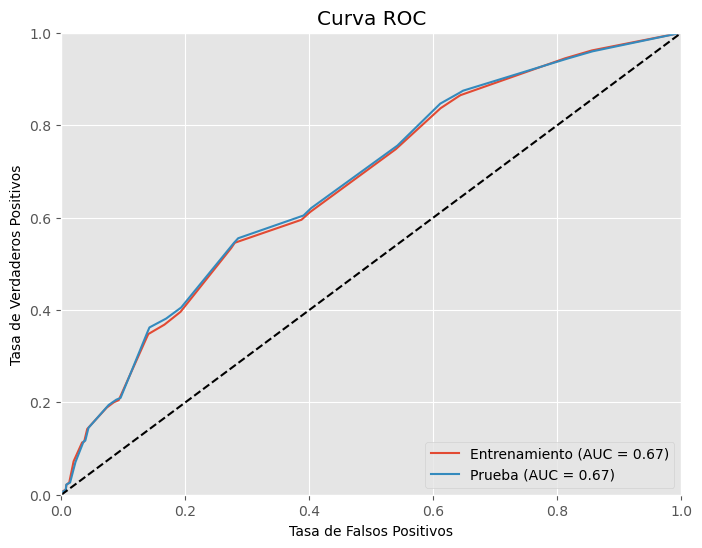

In [43]:

# Entrenar el modelo de árbol de decisiones con una profundidad máxima de 5 utilizando los datos resampleados
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_resampled_oversampled, y_train_resampled_oversampled)

# Obtener las probabilidades de predicción en lugar de las etiquetas predichas
y_train_pred_proba = dt_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = dt_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC) para los datos de entrenamiento y prueba
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Entrenamiento (AUC = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Prueba (AUC = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Y por último tenemos la curva roc de nuestro modelo de árbol de decisiones, la cual tiene el desempeño más bajo de los demás modelos, donde podemos ver que la curva es menor, lo cual nos indicaría un rendimiento prácticamente igual al azar, por lo cual es un modelo que no cumple con nuestro objetivo de poder predecir de manera precisa nuestos datos.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


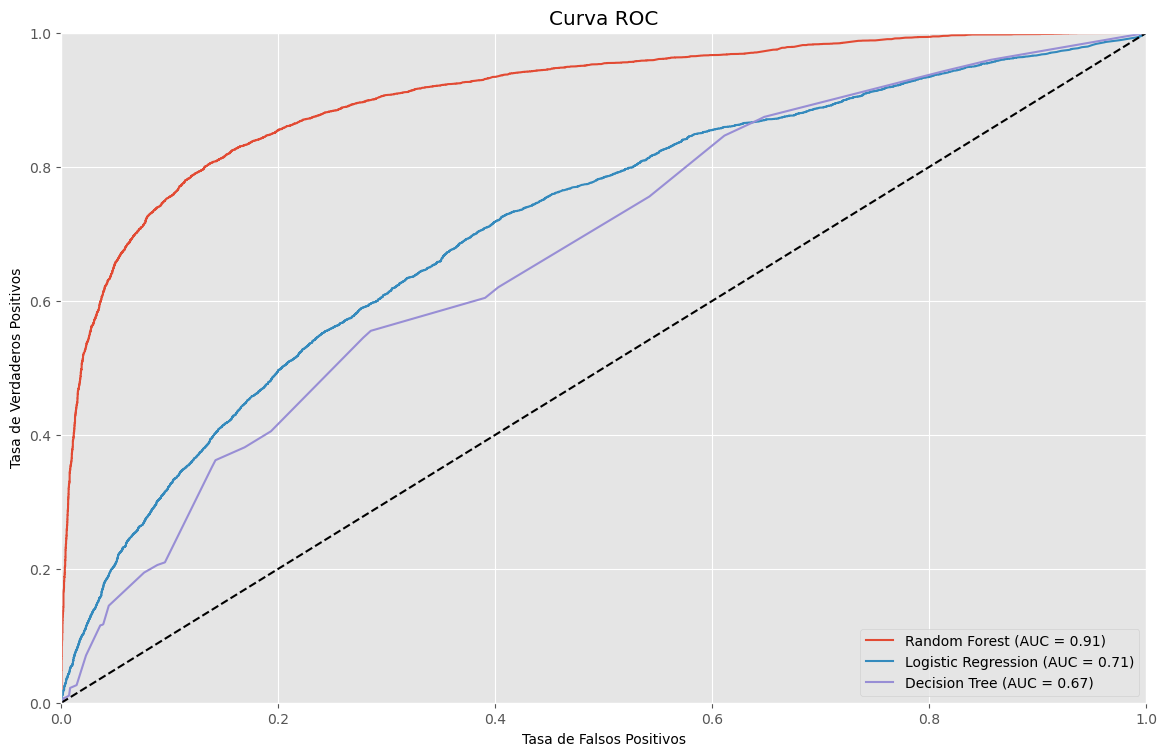

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener las probabilidades de las clases para cada modelo
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Calcular las tasas de verdaderos positivos y falsos positivos para cada modelo
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)

# Calcular el área bajo la curva ROC para cada modelo
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Graficar las curvas ROC
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_logistic, tpr_logistic, label=f"Logistic Regression (AUC = {auc_logistic:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")

# Configurar la gráfica
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Mostrar la gráfica
plt.show()


Y para finalizar, tenemos el modelo de curva ROC de nuestros 3 modelos, donde se puede visualizar que la línea del modelo de Random Forest es muy superior al modelo de regresión logística y el Árbol de decisiones, por lo cual, nuestro modelo Random Forest es el mejor modelo que desarrollamos, ya que es el que mejor se ajusta a los datos reales y a predecir.